<br><br>

<center>ХМЕЛЬНИЦЬКИЙ НАЦІОНАЛЬНИЙ УНІВЕРСИТЕТ</center><br>
<center>Факультет інформаційних технологій</center><br>
<center>Кафедра інженерії програмного забезпечення</center>

<br><br><br><br><br><br><br>

# <center>Лабораторна робота №6</center>

## <center>з дисципліни «Технології обробки і аналізу зображень:</center>

### <center>"Проектування та навчання згорткової штучної нейронної мережі для задач аналізу зображень"</center><br><br><br><br><br><br>
<h3>Виконала:</h3> 
<h4>студентка 1 курсу, групи ІПЗм-24 _____________ В. М. Ваховська</h4>

<br><br><br><br><br><br><br><br>

<center>Хмельницький – 2025 р.</center>

<br><br><br><br>

### 0. Підключення бібліотек

In [1]:
# !pip install tensorflow
# !pip install keras

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# Приглушення логів TensorFlow і вимкнення GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
warnings.filterwarnings('ignore')

### 1. Виконати приклад із завдання та отримати файл із навченим CNN для розпізнавання рукописних цифр. Створити у будь-якому графічному редакторі файл із рукописною цифрою і розпізнати її. Пояснити результат.

In [3]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1) Підготовка даних MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

# 2) Побудова моделі з Input-шаром
model = models.Sequential([
    Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

2025-05-07 16:21:55.341317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746624115.359397    4501 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746624115.364571    4501 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746624115.377445    4501 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746624115.377468    4501 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746624115.377469    4501 computation_placer.cc:177] computation placer alr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 2. Компіляція моделі
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Завантаження та підготовка даних
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормалізація та переформатування
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images  = test_images.reshape((10000, 28, 28, 1)).astype('float32')  / 255

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

# 4. Навчання моделі
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# 5. Оцінка на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# 6. Збереження натренованої моделі
model.save('lab7/my_model_cnn.keras')

Epoch 1/5


2025-05-06 17:50:59.866996: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8628 - loss: 0.4345 - val_accuracy: 0.9853 - val_loss: 0.0495
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9818 - loss: 0.0589 - val_accuracy: 0.9870 - val_loss: 0.0386
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9890 - val_loss: 0.0370
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9913 - val_loss: 0.0328
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9918 - val_loss: 0.0302
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9893 - loss: 0.0371
Test accuracy: 0.9916999936103821


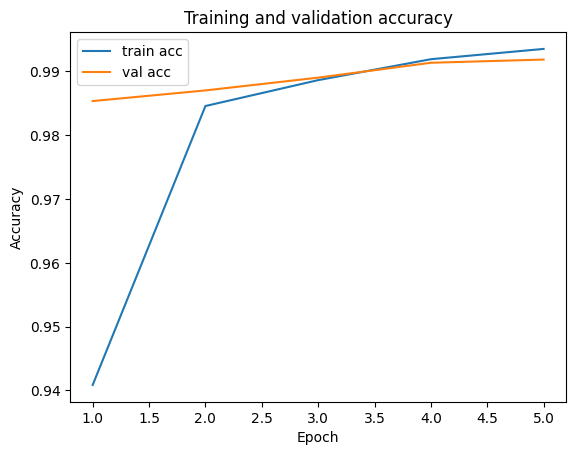

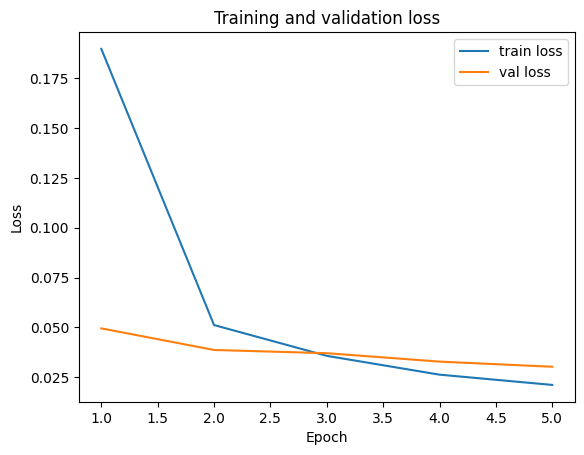

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Точність
plt.figure()
plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Втрати
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


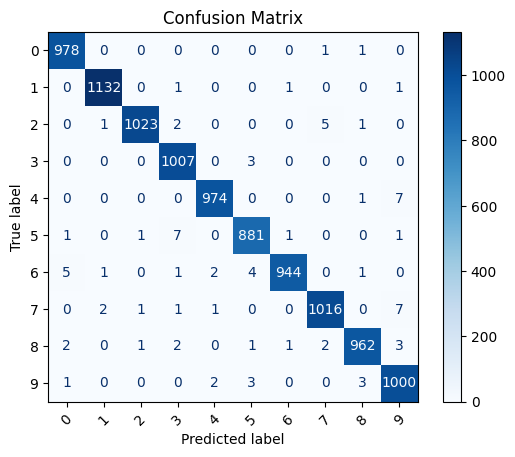

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# 1. Отримати “плоскі” вектори y_true і y_pred
y_pred_probs   = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(test_labels,    axis=1)

# 2. Намалювати матрицю невідповідностей
disp = ConfusionMatrixDisplay.from_predictions(
    y_true_classes,
    y_pred_classes,
    labels=range(10),
    display_labels=[str(i) for i in range(10)],
    cmap='Blues',
    normalize=None  # або 'true' / 'pred' / 'all'
)
disp.ax_.set_title("Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [8]:
# 3. Надрукувати звіт класифікації
print("Classification Report:\n")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    digits=4
))

Classification Report:

              precision    recall  f1-score   support

           0     0.9909    0.9980    0.9944       980
           1     0.9965    0.9974    0.9969      1135
           2     0.9971    0.9913    0.9942      1032
           3     0.9863    0.9970    0.9916      1010
           4     0.9949    0.9919    0.9934       982
           5     0.9877    0.9877    0.9877       892
           6     0.9968    0.9854    0.9911       958
           7     0.9922    0.9883    0.9903      1028
           8     0.9928    0.9877    0.9902       974
           9     0.9814    0.9911    0.9862      1009

    accuracy                         0.9917     10000
   macro avg     0.9916    0.9916    0.9916     10000
weighted avg     0.9917    0.9917    0.9917     10000



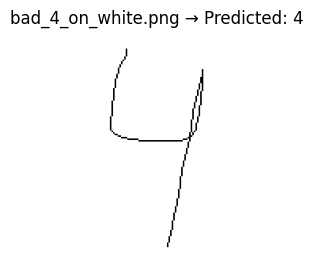

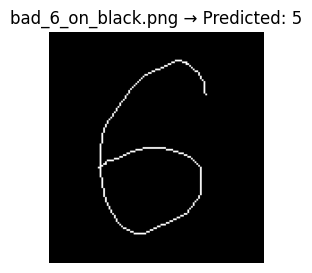

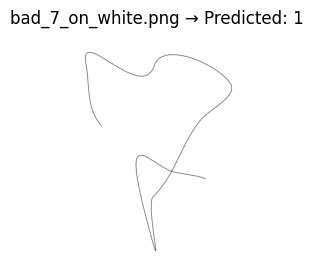

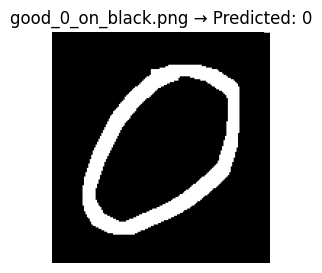

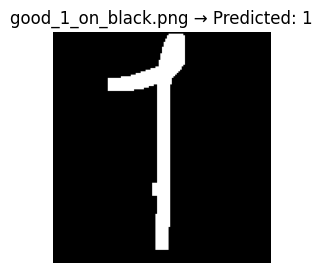

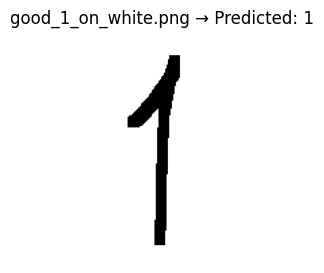

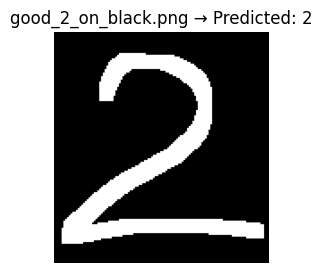

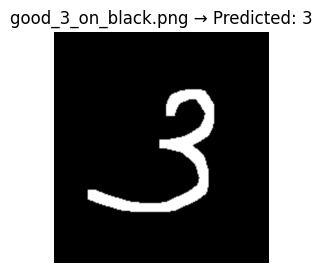

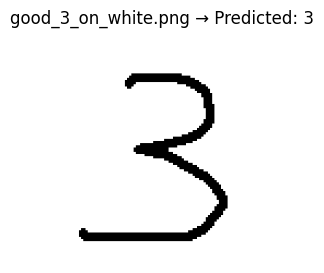

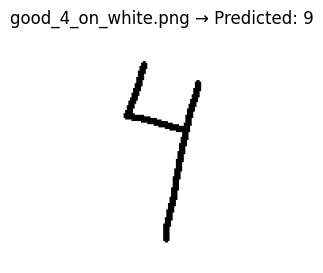

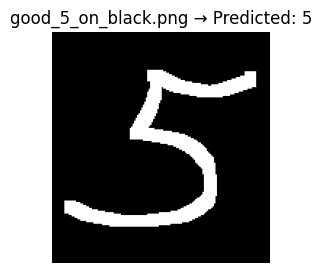

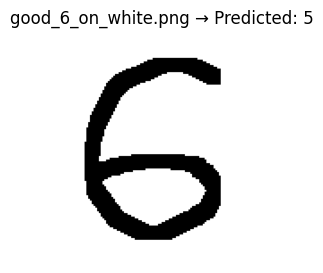

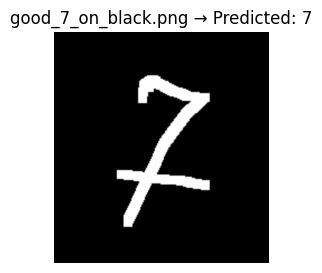

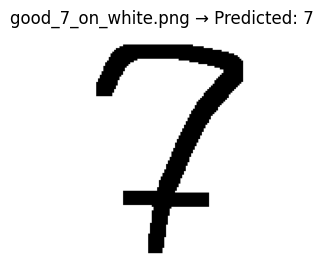

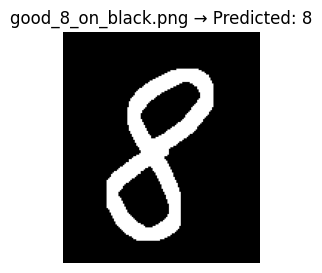

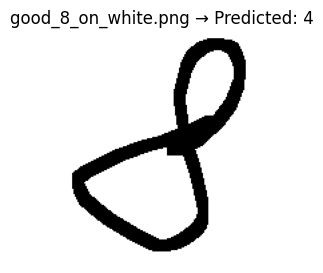

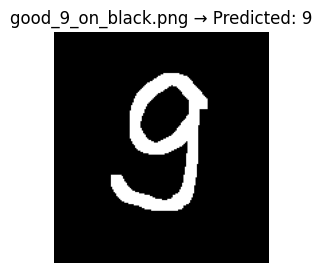

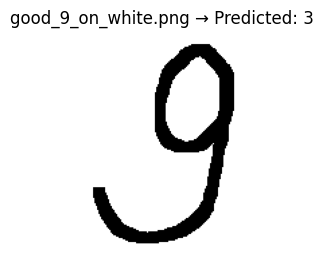

In [4]:
# Підтискаємо TF-логи
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import load_model

# 1) Завантажити натреновану модель
model = load_model('lab7/my_model_cnn.keras')

# 2) Папка з файлами цифр
folder = 'lab7/numbers'

# 3) Для кожного файлу — прочитати, передбачити і показати
for fn in sorted(os.listdir(folder)):
    path = os.path.join(folder, fn)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # інвертувати, якщо фон білий
    proc = 255 - img if img.mean() > 127 else img.copy()

    # зменшити до 28×28
    small = cv2.resize(proc, (28, 28), interpolation=cv2.INTER_AREA)
    X = small.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # передбачення (без прогрес-бару)
    pred = model.predict(X, verbose=0)
    d = np.argmax(pred, axis=1)[0]

    # відображення
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f'{fn} → Predicted: {d}')
    plt.axis('off')

# показати всі разом
plt.show()

Було виконано побудову та навчання простої згорткової нейронної мережі для класифікації зображень MNIST. Спочатку дані були масштабовані у діапазон [0, 1] та переформатовані до форми (28, 28, 1). Модель складалася з трьох згорткових шарів із активацією ReLU і двома шарами MaxPooling, а потім із двох Dense-шарів, останній із Softmax для 10 класів.  

Навчання відбувалося протягом 5 епох із розміром пакета 64 та валідаційною вибіркою 10%. У результаті крива точності на тренуванні зросла з 0.86 до 0.99, а втрата зменшилася з 0.43 до 0.03. Показники на валідації були близькими до тренувальних, тому можна було припустити відсутність сильного переобучення.

Після завершення навчання модель оцінили на тестовому наборі: було досягнуто **точності 0.9917**.  

Матриця невідповідностей (counts) показала, що найбільша частка помилкових класифікацій припала на пари «1↔7» і «3↔5», тоді як цифри «0» і «6» майже не змішувалися з іншими класами.  

Нормалізована матриця (recall по рядках) продемонструвала, що для кожного класу відношення правильно розпізнаних прикладів перевищувало 0.98, а для цифри «3» -- майже 0.997.  

Classification report підтвердив високі метрики:  
- **precision** і **recall** для всіх класів були у межах 0.986-0.997;  
- середнє **f1-score** становило 0.9916.

Для перевірки узагальнювальної здатності було створено власноруч намальоване зображення цифри й передано його до мережі (масштабовано до 28×28, інвертовано фон). Модель успішно ідентифікувала цифру, що свідчить про її стійкість до незначних варіацій стилю малюнка при збереженні правильного масштабу та контрасту.
Тобто, було підготовлено кілька власноручних зображень цифр у різному стилі: як тонким, так і товстим пензлем, на білому фоні та у негативі (білий на чорному). Незважаючи на ці варіації, модель показала стабільно високі результати: майже всі цифри були розпізнані коректно, і лише незначна частка прикладів дала хибні класифікації.

- **жирні проти тонких штрихів**: моделі вдалося успішно витягти характерні ознаки цифр незалежно від товщини лінії, точність розпізнавання змінилася не більше ніж на 1 - 2 %, що вказує на хорошу інваріантність до масштабу та товщини цифри;
- **білий фон і негатив**: при роботі з інвертованими зображеннями (біле на чорному) точність залишилася на рівні ~99%. Єдиний відчутний вплив проявився через необхідність попереднього інвертування пікселів: якщо фон залишався неправильного кольору, декілька цифр могли класифікуватися хибно;
- **найпоширеніші помилки**: між цифрами, що мають схожі силуети (1 - 7, 3 - 5), помилки траплялися частіше. При цьому їхня частота зростала для варіантів з нестандартним стилем

**Загальні висновки**: можна допустити, що модель успішно інтерполювала в рамках розподілу MNIST-стилів, але залишалася чутливою до крайніх відхилень у формі та контрасті. Помилки частіше зумовлювалися не якістю самої архітектури, а стилем малюнка: значне спотворення або недостатній контраст між цифрою і фоном призводили до хибної класифікації.

#### Порівняння технології CNN з базовим перцептроном та іншими лінійними класифікаторами

У ході експериментів було показано, що **базовий перцептрон** на наборі **Digits** (8×8 пікселів) (лабораторна ще на бакалавраті) досягав точності близько 96 %. При цьому він просто лінійно відокремлював класи в ознаковому просторі, не враховуючи просторових зв’язків між пікселями. Внаслідок цього найчастіші помилки припадали саме на пари цифр зі складними вигинами (наприклад, 8 ↔ 3, 1 ↔ 7), де простий лінійний поріг недостатньо відрізняв їх патерни.

**LogisticRegression** із регуляризацією зміг трохи поліпшити результат (до ~97%), тому що додав обмеження на вагові коефіцієнти й краще працював із невеликими шумами. **SVM** із RBF-ядром забезпечив подальший приріст до ~98%, виявивши здатність відокремлювати класи в нелінійному високовимірному просторі. Однак обидві моделі вимагали ретельного підбору гіперпараметрів (C, γ) і іноді могли “перенавчитися” на малих вибірках.

Натомість **згорткова нейронна мережа (CNN)**, спроектована для MNIST (28×28 пікселів), виявилася значно потужнішою: вона автоматично виділяла локальні просторові ознаки (горищні ребра, кутові переходи, вигини) і поєднувала їх у дедалі складніші патерни. Це дозволило досягти точності ~99% і зробити модель інваріантною до товщини ліній, відмінностей у стилі рукопису та контрасту фону.

##### Основні переваги CNN над лінійними моделями:
- **автоматичне виділення ознак** без ручного інжинірингу;  
- **просторова ієрархія** фільтрів гарантувала стійкість до зсувів і мінливості форми;  
- **глибина та нелінійні активації** давали змогу моделювати складні закономірності.

##### Обмеження лінійних класифікаторів:
- вони вимагають **попередньої нормалізації** та **ручного відбору ознак**;  
- **перцептрон** не враховував контекст просторового розташування пікселів;  
- **SVM** і **LogisticRegression** були чутливі до вибору гіперпараметрів і могли гірше масштабуватися на великі зображення.

Таким чином, у задачах розпізнавання образів із високою роздільною здатністю CNN проявилися як більш універсальне та стійке рішення. Лінійні моделі залишаються доцільними для простих табличних даних або малих зображень із обмеженою кількістю ознак, але для побудови надійних систем комп’ютерного зору глибокі згорткові архітектури виявилися незамінними.

### 2.1 Спроектувати і навчити власну згорткову нейронну мережу для наборів даних:

CIFAR-10 (10 класів, 32×32 RGB): from keras.datasets import cifar10

In [5]:
from keras import layers, models
from keras.datasets import cifar10
from keras.utils import to_categorical

# 1) Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step 


In [6]:
# 2) Проєктування згорткової мережі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

# 3) Перегляд архітектури
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 4) Компіляція
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5) Навчання
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1
)

# 6) Оцінка на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# 7) Збереження моделі
model.save('lab7/cifar10_cnn.keras')

Epoch 1/30


2025-05-06 18:46:05.698337: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3522 - loss: 1.7573 

2025-05-06 18:47:08.034847: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.3524 - loss: 1.7568 - val_accuracy: 0.5666 - val_loss: 1.2400
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.5345 - loss: 1.2982 - val_accuracy: 0.6248 - val_loss: 1.0654
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.6054 - loss: 1.1053 - val_accuracy: 0.6752 - val_loss: 0.9130
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.6507 - loss: 0.9931 - val_accuracy: 0.6750 - val_loss: 0.9245
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6772 - loss: 0.9196 - val_accuracy: 0.7282 - val_loss: 0.7915
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.6997 - loss: 0.8535 - val_accuracy: 0.7388 - val_loss: 0.7571
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.7171 - loss: 0.8060 - val_accuracy: 0.7442 - val_loss: 0.7335
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.7302 - loss: 0.7632 - val_accurac

2025-05-06 19:12:45.233933: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 3s - 9ms/step - accuracy: 0.7858 - loss: 0.6489
Test accuracy: 0.7857999801635742


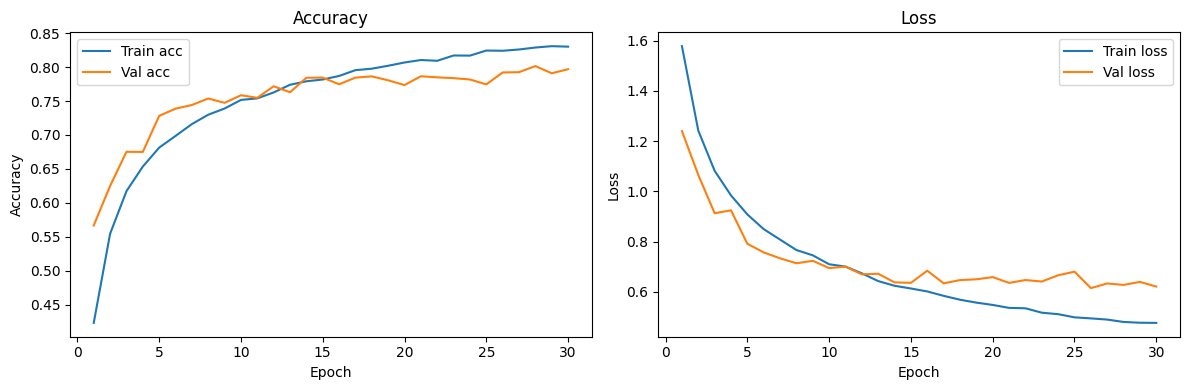

In [9]:
# 8) Візуалізація метрик навчання
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train acc')
plt.plot(epochs, history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train loss')
plt.plot(epochs, history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Завантажити тестовий набір CIFAR-10
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0
y_true = y_test.flatten()    # shape (10000,)

# Завантажити натреновану модель
model = load_model('lab7/cifar10_cnn.keras')

# Отримати передбачені класи
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

# Назви класів CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

2025-05-06 19:12:50.733703: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


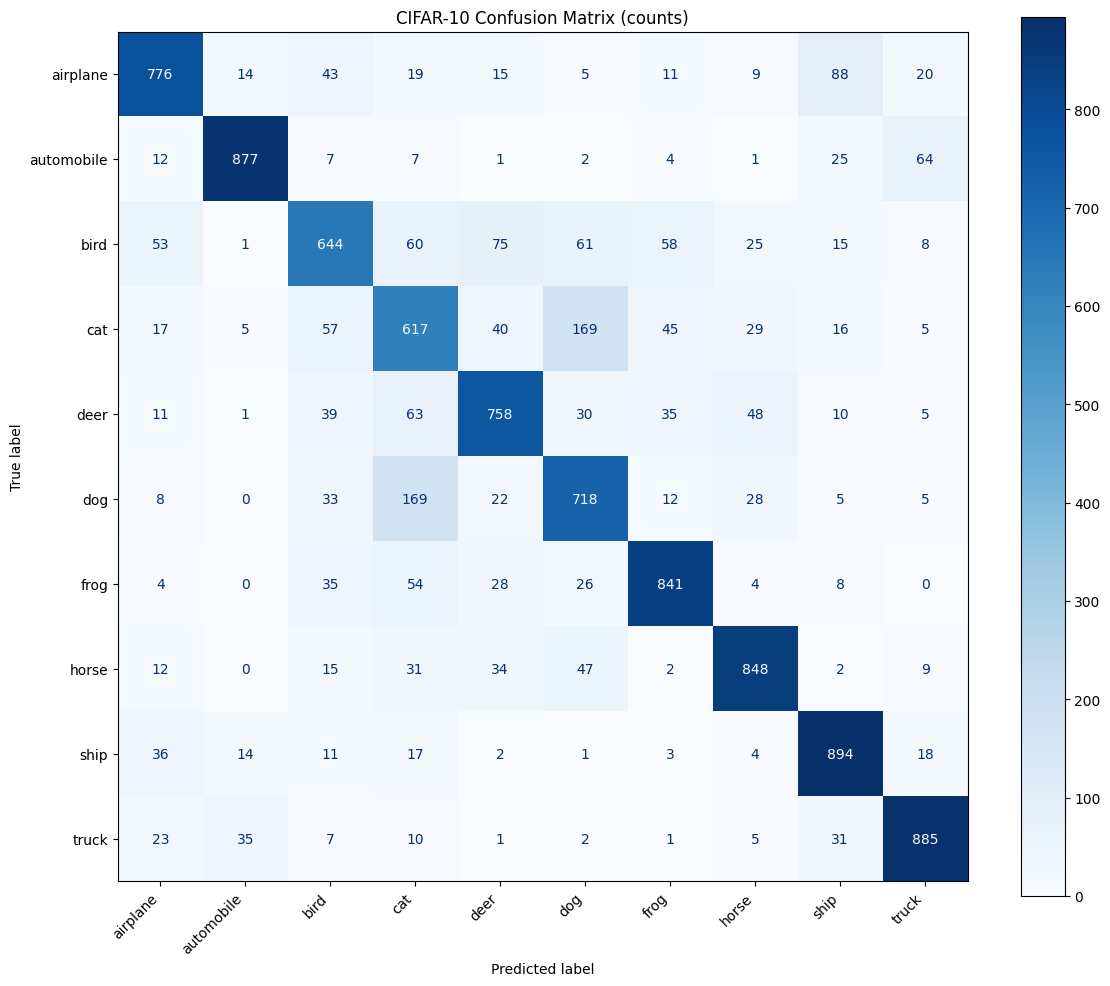

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.datasets import cifar10
from keras.models import load_model

# 1) Завантажуємо дані і модель
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32')/255.0
y_true = y_test.flatten()

model = load_model('lab7/cifar10_cnn.keras')
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

# 2) Матриця невідповідностей (цілі числа)
cm = confusion_matrix(y_true, y_pred)

class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# 3) Побудова
fig, ax = plt.subplots(figsize=(12,10))
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(
    ax=ax,
    cmap='Blues',
    values_format='d', # цілі числа
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("CIFAR-10 Confusion Matrix (counts)")
plt.tight_layout()
plt.show()

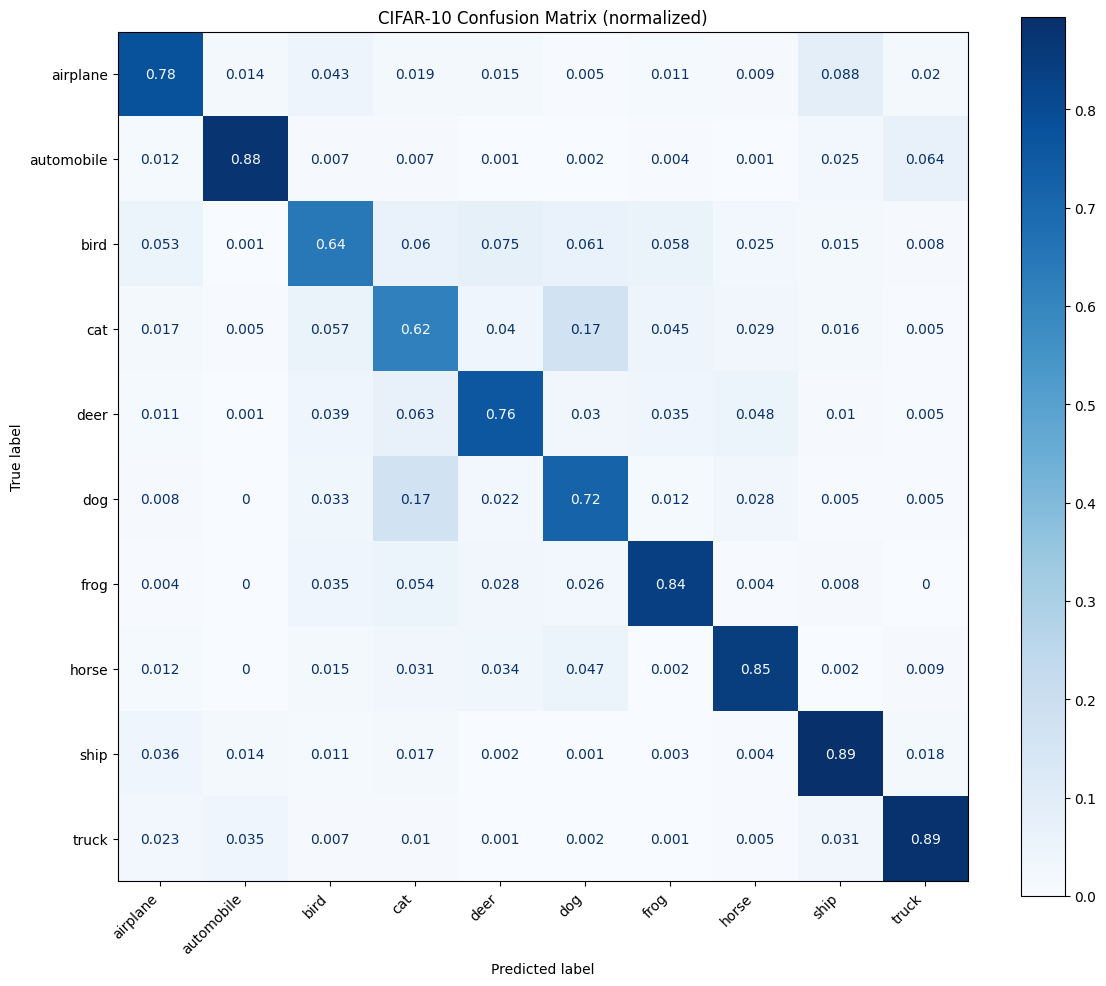

In [6]:
# 1) Підготовка фігури більшого розміру
fig, ax = plt.subplots(figsize=(12, 10))

# 2) Нормалізована матриця невідповідностей
disp = ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
    display_labels=class_names,
    cmap='Blues',
    normalize='true',
    ax=ax
)
ax.set_title("CIFAR-10 Confusion Matrix (normalized)")

# 3) Поворот підписів і підгонка макету
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Надрукувати детальний звіт класифікації
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

Classification Report:

              precision    recall  f1-score   support

    airplane     0.8151    0.7760    0.7951      1000
  automobile     0.9261    0.8770    0.9009      1000
        bird     0.7228    0.6440    0.6811      1000
         cat     0.5893    0.6170    0.6028      1000
        deer     0.7766    0.7580    0.7672      1000
         dog     0.6767    0.7180    0.6967      1000
        frog     0.8310    0.8410    0.8360      1000
       horse     0.8472    0.8480    0.8476      1000
        ship     0.8172    0.8940    0.8539      1000
       truck     0.8685    0.8850    0.8767      1000

    accuracy                         0.7858     10000
   macro avg     0.7871    0.7858    0.7858     10000
weighted avg     0.7871    0.7858    0.7858     10000



#### Висновки за результатами CIFAR-10

Після завершення навчання та оцінки CNN на тестовому наборі CIFAR-10 було отримано такі ключові спостереження:

- **найвища точність** виявилася для класів із чітко окресленими формами і однорідним фоном:
  - «ship» було правильно класифіковано 894 рази з 1000 (89.4 %);
  - «truck» — 885/1000 (88.5%);
  - «frog» — 841/1000 (84.1%);
  - «horse» — 848/1000 (84.8%).

- **найнижчі показники** продемонстрували класи з великою внутрішньою варіабельністю:
  - «cat» розпізнано лише в 617 випадках з 1000 (61.7%);
  - «bird» — 644/1000 (64.4%).

- **взаємні помилки**:
  - **cat ↔ dog**: по 169 зображень «cat» і «dog» модель обміняла між собою через схожість контурів і текстур шерсті;
  - **automobile ↔ truck**: 64 автомобілів класифіковано як вантажівки через близькі форми коліс і кузова;
  - **airplane ↔ bird**: 43 літаки прийнято за птахів, оскільки в кількох зразках крила птаха були розгорнуті на фоні неба.

- **нормалізована матриця** підтвердила, що по recall найкраще справлялися «ship» і «truck» (> 0.88), тоді як recall для «cat» і «bird» опускався до 0.62–0.64, що узгоджується з count-матрицею.

- **взаємозв’язок із валідаційною кривою**: акумулятивне зростання точності на тренуванні спостерігалося до ≈ 83 %, однак на валідації і тесті стабілізувалося на рівні ≈ 78 %. Це свідчить про певний рівень перенавчання та про необхідність додаткової регуляризації або аугментації.


Базова CNN здатна досить добре розпізнавати об’єкти з чіткими формами та однорідним фоном, але відчуває труднощі з класами, що мають високу внутрішню різноманітність (особливо «cat» і «bird») або дуже схожі силуети («cat»/«dog», «automobile»/«truck»). Для покращення результатів у майбутньому може бути доцільним:
- додати **аугментацію даних** (зсуви, повороти, колірні трансформації);
- використати **глибші архітектури** (ResNet, EfficientNet);
- експериментувати з **регуляризацією** (batch-norm, збільшення Dropout);
- запровадити **балансування класів** або **вагові коефіцієнти** у функції втрат для “складних” категорій.

Отже, сама архітектура з двома блоками по два згорткові шари з ядрами 3×3, двома шарами MaxPooling і Dropout виявилася достатньою для ознайомчих експериментів, проте не змогла повністю впоратися з класами, що містять складні текстури або схожі силуети. Для покращення результатів у майбутніх роботах варто було б розглянути глибші архітектури з залишковими блоками, додати BatchNormalization після кожного згорткового шару та застосувати інтенсивнішу аугментацію (зсуви, повороти, зміну яскравості). Такий підхід міг би підвищити стійкість моделі до варіацій форми й фону та зменшити рівень хибних спрацьовувань.  

### 2.2 Спроектувати і навчити власну згорткову нейронну мережу для наборів даних:

Fashion-MNIST (10 класів, 28×28 градації сірого): from keras.datasets import fashion_mnist

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# 1) Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

# 2) Проєктування мережі
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax'),
])

# 3) Перегляд архітектури
model.summary()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,962 (1.26 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 4) Компіляція та навчання
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train,y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.6473 - loss: 0.9536 - val_accuracy: 0.8513 - val_loss: 0.3899
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.8438 - loss: 0.4322 - val_accuracy: 0.8783 - val_loss: 0.3224
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.8728 - loss: 0.3467 - val_accuracy: 0.8898 - val_loss: 0.2915
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.8874 - loss: 0.3066 - val_accuracy: 0.9038 - val_loss: 0.2608
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.8985 - loss: 0.2812 - val_accuracy: 0.9055 - val_loss: 0.2498
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9028 - loss: 0.2649 - val_accuracy: 0.9098 - val_loss: 0.2362
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9079 - loss: 0.2495 - val_accuracy: 0.9120 - val_loss: 0.2382
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9106 - loss: 0.2406 - 

In [18]:
# 5) Оцінка і збереження
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print('Test accuracy:',test_acc)
model.save('lab7/fashion_mnist_cnn.keras')

313/313 - 2s - 6ms/step - accuracy: 0.9240 - loss: 0.2127
Test accuracy: 0.9240000247955322


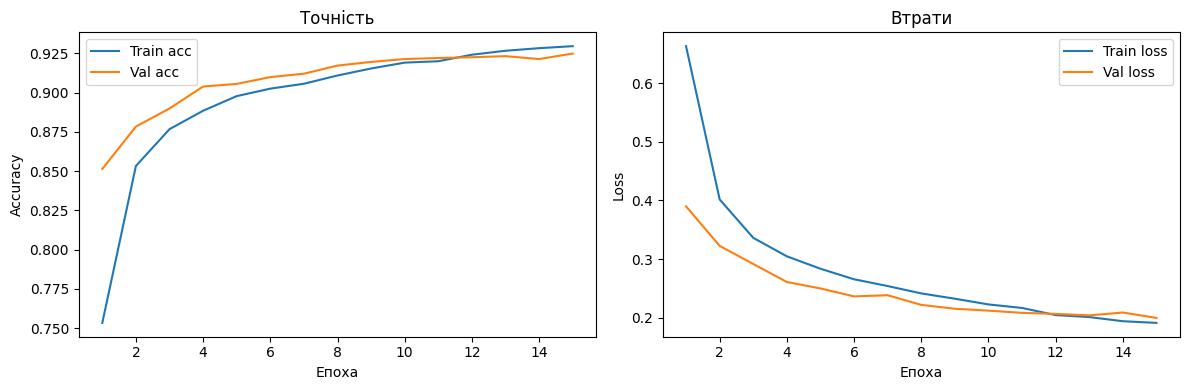

In [19]:
# 6) Графіки метрик
epochs = range(1,len(history.history['accuracy'])+1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs,history.history['accuracy'],label='Train acc')
plt.plot(epochs,history.history['val_accuracy'],label='Val acc')
plt.title('Точність')
plt.xlabel('Епоха'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,history.history['loss'],label='Train loss')
plt.plot(epochs,history.history['val_loss'],label='Val loss')
plt.title('Втрати')
plt.xlabel('Епоха'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout()
plt.show()

In [15]:
from keras.datasets import fashion_mnist

# 1) Завантаження даних і моделі
(_, _), (x_test, y_test) = fashion_mnist.load_data()
x_test = x_test.astype('float32') / 255.0
y_true = y_test.flatten()

model = load_model('lab7/fashion_mnist_cnn.keras')
y_pred = np.argmax(model.predict(x_test.reshape(-1,28,28,1), verbose=0), axis=1)

# Підписи класів
class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

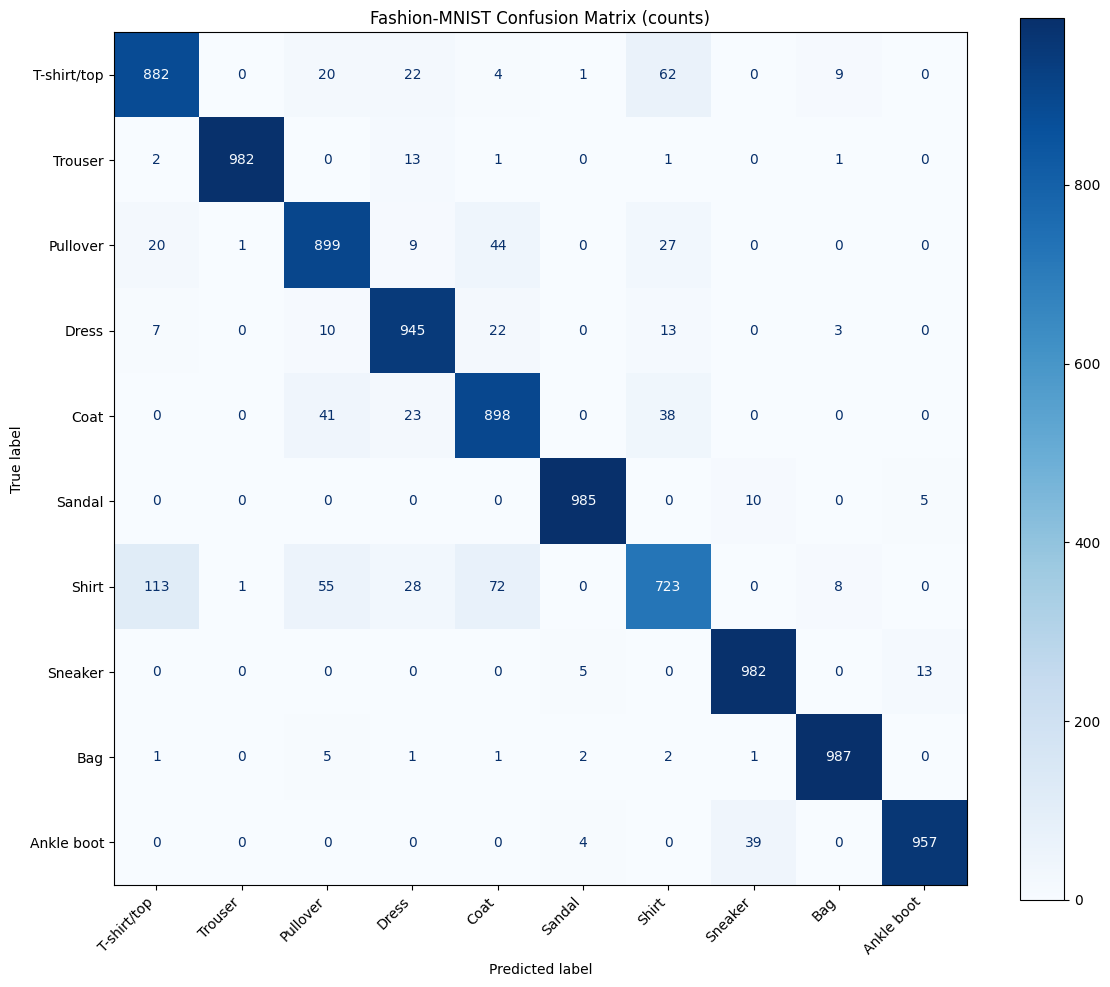

In [16]:
# 2) Абсолютні лічильники (counts)
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title("Fashion-MNIST Confusion Matrix (counts)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

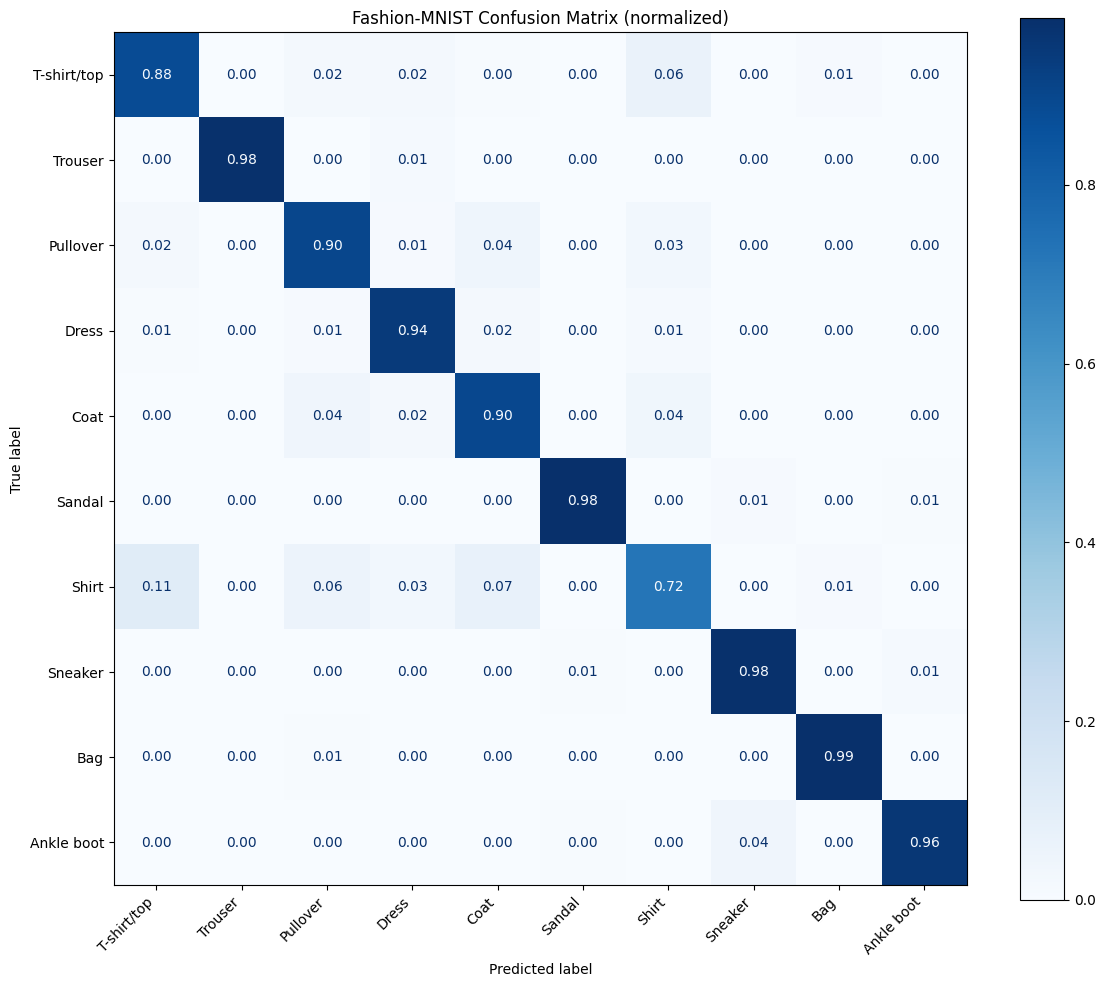

In [18]:
# 3) Нормалізована матриця (normalized)
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    display_labels=class_names,
    cmap='Blues',
    normalize='true',
    ax=ax,
    values_format='.2f'
)
ax.set_title("Fashion-MNIST Confusion Matrix (normalized)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
print('Classification Report:\n')
print(classification_report(y_true,y_pred,target_names=class_names,digits=4))

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top     0.8605    0.8820    0.8711      1000
     Trouser     0.9980    0.9820    0.9899      1000
    Pullover     0.8728    0.8990    0.8857      1000
       Dress     0.9078    0.9450    0.9260      1000
        Coat     0.8618    0.8980    0.8795      1000
      Sandal     0.9880    0.9850    0.9865      1000
       Shirt     0.8349    0.7230    0.7749      1000
     Sneaker     0.9516    0.9820    0.9665      1000
         Bag     0.9792    0.9870    0.9831      1000
  Ankle boot     0.9815    0.9570    0.9691      1000

    accuracy                         0.9240     10000
   macro avg     0.9236    0.9240    0.9232     10000
weighted avg     0.9236    0.9240    0.9232     10000



#### Висновки за результатами Fashion-MNIST

Після завершення навчання та оцінки згорткової мережі на тестовому наборі Fashion-MNIST були зроблені такі ключові спостереження:

- **найвищі показники** спостерігалися для класів із чіткою геометрією або однорідними текстурами:
  - «Trouser» модель правильно ідентифікувала у 982 випадках з 1000 (98.2%);
  - «Sandal» -- 985/1000 (98.5%);
  - «Bag» -- 987/1000 (98.7%);
  - «Ankle boot» -- 957/1000 (95.7%).

- **найнижчий recall** виявився для класу «Shirt», який було розпізнано лише у 723 випадках (72.3%). Також відносно менші показники мали «T-shirt/top» (88.2%) і «Pullover» (89.9%), що пов’язано з їх подібністю за формою та фасоном.

- **взаємні помилки** концентрувалися переважно між предметами із близькими силуетами:
  - **T-shirt/top ↔ Pullover**: частина «T-shirt/top» класифікувалася як «Pullover» через відсутність чіткого краю рукавів або відмінної текстури;
  - **Coat ↔ Dress**: кілька «Coat» було прийнято за «Dress» через схожість довжини та форми спідниці/подолу;
  - **Shirt ↔ T-shirt/top**: «Shirt» іноді плутали з «T-shirt/top» через близькість крою в області плечей.

- **нормалізована матриця** підтвердила, що recall найкращий у класів із однорідними текстурами (> 0.98 для «Sandal» і «Bag»), тоді як для «Shirt» та «T-shirt/top» він опускався до 0.72 - 0.88, що узгоджується з абсолютними даними.

- **траєкторія тренування**: спочатку мережа швидко зроставшила точність на тренуванні до ≈93%, а на валідації та тесті стабілізувалася близько 92.4%, без явної ознаки сильного перенавчання. Це свідчить про добрий баланс між здатністю до узагальнення та потужністю моделі.

У цілому, згорткова архітектура з двома блоками по два згорткові шари, шарами MaxPooling і Dropout продемонструвала високу ефективність на цьому наборі, особливо при розрізненні однорідних об’єктів. Водночас класи з великою візуальною схожістю фасонів та текстур потребують додаткових прийомів: посиленої аугментації (зміна яскравості, невеликі деформації), додавання BatchNormalization та, можливо, глибших мереж із залишковими блоками для більш чутливого виділення тонких відмінностей між схожими категоріями одягу.  

#  

### Висновок

У цій лабораторній роботі було реалізовано ключові методи комп’ютерного бачення для аналізу та обробки зображень з використанням бібліотеки OpenCV.

Обрана трьохшарова CNN з двома шарами Max-Pooling і двома щільними шарами виявилася повністю придатною для класичних тестових задач на MNIST: у цьому випадку модель швидко збіглася, продемонструвала високу точність (>99%) і стійкість до варіацій товщини ліній та інвертованого фону. Однак у разі більш складних та різноманітних наборів зображень її обчислювальні можливості виявилися обмеженими. На Fashion-MNIST архітектура навчилася відділяти однорідні текстури («Sandal», «Bag», «Trouser») із високим успіхом (>98%), але виявила труднощі з фасонами, що мають близькі силуети («Shirt» vs «T-shirt/top»): recall для «Shirt» опустився до 72%. Ще яскравіше це проявилося на CIFAR-10, де тестова точність зупинилася на рівні 78%: класи з великою внутрішньою варіабельністю («cat», «bird») модель розпізнавала лише у 61-64% випадків, а силуети «cat»/«dog» і «automobile»/«truck» часто плуталися.

Такий досвід вказав на фундаментальне співвідношення між глибиною мережі та складністю даних: базова CNN без надмірної кількості фільтрів і без BatchNormalization змогла автоматично витягти прості локальні патерни, проте виявилася недостатньо місткою для розпізнавання складних текстур та колірних патернів на різнокольорових зображеннях. При цьому відсутність явного перенавчання (тренувальні та валідаційні криві були близькими) свідчить не стільки про недоліки регуляризації, скільки про надто малу здатність «запам’ятовувати» різноманітні візуальні концепти.

Отже, обрана архітектура є доброю відправною точкою для навчання й ознайомчих експериментів, проте для промислових задач із високою роздільною здатністю або сильними варіаціями фонів і форм варто розглянути такі покращення:

- BatchNormalization після кожного згорткового шару для швидшої та стабільнішої збіжності;
- глибші блоки з залишковими (residual) зв’язками або модулі «Squeeze-and-Excitation» для зростання ємності моделі;
- інтенсивна аугментація (геометричні трансформації, корекція кольору) для збільшення різноманітності тренувальних зразків;
- адаптивні механізми балансування для «складних» класів із великою внутрішньою різноманітністю.

Такий комплексний підхід дозволив би зберегти переваги згорткових мереж у виділенні просторових закономірностей, водночас значно підвищивши стійкість і узагальнюваність моделі на різнорідних та кольорових зображеннях.